# 图像特效-素描图像提取

In [51]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [52]:
src = cv2.imread('../datas/p3.jpg')
gray = cv2.imread('../datas/p3.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [53]:
def get_setch_pixels(src,thresh=20):
    srcf = src.astype(np.float32)
    if len(srcf.shape) < 3:
        return np.zeros_like(src)
    dst = np.zeros_like(srcf)
    invert = 255.0 - srcf
    gauss = cv2.GaussianBlur(invert,(3,3),0,0).astype(np.float32)
    dst = srcf + srcf * gauss / (255 - gauss + 1.0e-5)
    
    dst[dst > 255] = 255
    dst[dst < 0] = 0
#     dst = 255- np.minimum(dst,255)
    return np.uint8(dst)

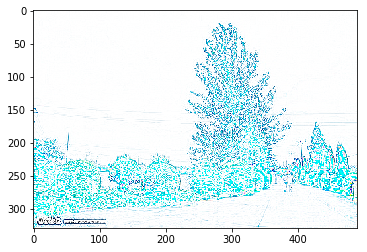

In [54]:
dst = get_setch_pixels(rgb)
plt.imshow(dst)

In [59]:
def get_setch_pixels2(src,thresh=20):
    srcf = src.astype(np.float32)
    if len(srcf.shape) < 3:
        return np.zeros_like(src)
#     dst = np.zeros_like(srcf)
    gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY).astype(np.uint8)
    sobelX = cv2.Sobel(gray,cv2.CV_16S,1,0)
    sobelY = cv2.Sobel(gray,cv2.CV_16S,0,1)
    sobel = np.abs(sobelX) + np.abs(sobelY)
#     sobmin,sobmax = cv2.minMaxLoc(sobel)
    dst = cv2.normalize(sobel,0,255,cv2.NORM_MINMAX)
#     dst = 255- np.minimum(dst,255)
#     dst[dst == 0] = 255
    return np.uint8(dst)

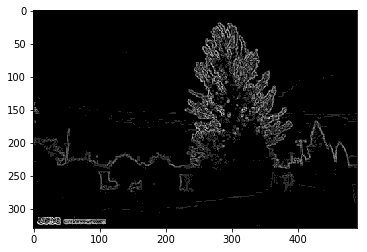

In [60]:
dst = get_setch_pixels2(rgb)
plt.imshow(dst,'gray')

In [63]:
def get_setch_pixels3(src,thresh=180):
    kernel = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ])
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dstr =  signal.convolve2d(srcf[:,:,0],kernel, boundary='symm', mode='same')
    dstg =  signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
    dstb =  signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
    dst = cv2.merge([dstr,dstg,dstb])
    dst = dst * (1+thresh) / 100.0
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return np.uint8(dst)

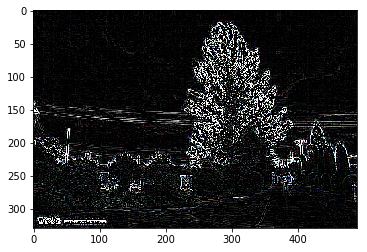

In [64]:
dst = get_setch_pixels3(rgb)
plt.imshow(dst)